In [27]:
import cdsapi
import requests
import os
import time
from geopy.geocoders import Nominatim
import xarray as xr
import pygrib

In [23]:


# select the years you want to download:
start_year = 2004
end_year = 2006
year_range = [i for i in range(start_year, end_year + 1)]
print(year_range)

# Use geopy to get the latitude and longitude of the city
geolocator = Nominatim(user_agent="permaculture-climate")
location = geolocator.geocode("Puebla de don Fadrique, Spain")

# Add a delay between requests
time.sleep(1)

c = cdsapi.Client()
try:
    data = c.retrieve("reanalysis-era5-single-levels-monthly-means",
    {"format": "grib",
     "product_type": "monthly_averaged_reanalysis_by_hour_of_day",
     "variable": ['10m_u_component_of_wind', '10m_v_component_of_wind', 
                '2m_temperature',
                #'snowfall', 
                'soil_temperature_level_1', 
                'soil_type',
                'total_cloud_cover', 
                'total_precipitation',
                ],
    "area": [location.latitude + 1, 
             location.longitude - 1, 
             location.latitude - 1, 
             location.longitude + 1],  # North, West, South, East. 
    "year": year_range,
    "month": ['01', '02', '03',
           '04', '05', '06',
           '07', '08', '09',
           '10', '11', '12'],
    "time": ["00:00","01:00","02:00","03:00","04:00","05:00",
             "06:00","07:00","08:00","09:00","10:00","11:00",
             "12:00", "13:00","14:00","15:00","16:00","17:00",
             "18:00","19:00","20:00","21:00","22:00","23:00"]
    })

    # Get the location of the file to download
    url = data.location

    # Download the file
    response = requests.get(url)

    # Check if the request was successful
    response.raise_for_status()

except requests.exceptions.HTTPError as errh:
    print ("HTTP Error:",errh)
except requests.exceptions.ConnectionError as errc:
    print ("Error Connecting:",errc)
except requests.exceptions.Timeout as errt:
    print ("Timeout Error:",errt)
except requests.exceptions.RequestException as err:
    print ("Something went wrong with the request:",err)

else:
    # If the request was successful, write the file
    filename = 'download.grib'
    with open(filename, 'wb') as f:
        f.write(response.content)

    # Print the location where the file is saved
    print(f"File saved at: {os.path.abspath(filename)}")

ModuleNotFoundError: No module named 'pygrib'

In [26]:


# Open the GRIB file
ds = xr.open_dataset('download.grib', engine='cfgrib')

# Access data variables in the dataset
print(ds)

# Close the dataset when done
ds.close()

skipping variable: paramId==228 shortName='tp'
Traceback (most recent call last):
  File "c:\Users\matthias\miniconda3\envs\permaculture\Lib\site-packages\cfgrib\dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Users\matthias\miniconda3\envs\permaculture\Lib\site-packages\cfgrib\dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1072915200, 1072918800, 1072922400, 1072926000, 1072929600,
       1072933200, 1072936800, 1072940400, 1072944000, 1072947600,
       1072951200, 1072954800, 1072958400, 1072962000, 1072965600,
       1072969200, 1072972800, 1072976400, 1072980000, 1072983600,
       1072987200, 1072990800, 1072994400, 1072998000, 1075593600,
       1075597200, 1075600800, 1075604400, 1075608000, 1075611600,
       1075615200, 1075618800, 1075622400, 1075626000, 1075629600,
       

<xarray.Dataset>
Dimensions:              (time: 864, latitude: 9, longitude: 9)
Coordinates:
    number               int32 ...
  * time                 (time) datetime64[ns] 2004-01-01 ... 2006-12-01T23:0...
    step                 timedelta64[ns] ...
    surface              float64 ...
  * latitude             (latitude) float64 38.96 38.71 38.46 ... 37.21 36.96
  * longitude            (longitude) float64 -3.435 -3.185 ... -1.684 358.6
    valid_time           (time) datetime64[ns] ...
    depthBelowLandLayer  float64 ...
Data variables:
    u10                  (time, latitude, longitude) float32 ...
    v10                  (time, latitude, longitude) float32 ...
    t2m                  (time, latitude, longitude) float32 ...
    stl1                 (time, latitude, longitude) float32 ...
    slt                  (time, latitude, longitude) float32 ...
    tcc                  (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre: 

In [28]:
import xarray as xr

# List of variables to load
variables = ['Total cloud cover', 'Soil temperature level 1', '10 metre V wind component', 
             '2 metre temperature', 'Soil type', 'Total precipitation', '10 metre U wind component']

# Dictionary to hold the datasets
datasets = {}

# Open the GRIB file for each variable
for var in variables:
    ds = xr.open_dataset('download.grib', engine='cfgrib', backend_kwargs={'filter_by_keys': {'parameterName': var}})
    datasets[var] = ds

# Print the datasets
for var, ds in datasets.items():
    print(f"{var}:")
    print(ds)
    print("\n")

Total cloud cover:
<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.7
    history:      2023-11-23T16:56 GRIB to CDM+CF via cfgrib-0.9.10.4/ecCodes...


Soil temperature level 1:
<xarray.Dataset>
Dimensions:              (time: 864, latitude: 9, longitude: 9)
Coordinates:
    number               int32 ...
  * time                 (time) datetime64[ns] 2004-01-01 ... 2006-12-01T23:0...
    step                 timedelta64[ns] ...
    depthBelowLandLayer  float64 ...
  * latitude             (latitude) float64 38.96 38.71 38.46 ... 37.21 36.96
  * longitude            (longitude) float64 -3.435 -3.185 ... -1.684 358.6
    valid_time           (time) datetime64[ns] ...
Data variables:
    stl1                 (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conv

skipping variable: paramId==228 shortName='tp'
Traceback (most recent call last):
  File "c:\Users\matthias\miniconda3\envs\permaculture\Lib\site-packages\cfgrib\dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Users\matthias\miniconda3\envs\permaculture\Lib\site-packages\cfgrib\dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([1072915200, 1072918800, 1072922400, 1072926000, 1072929600,
       1072933200, 1072936800, 1072940400, 1072944000, 1072947600,
       1072951200, 1072954800, 1072958400, 1072962000, 1072965600,
       1072969200, 1072972800, 1072976400, 1072980000, 1072983600,
       1072987200, 1072990800, 1072994400, 1072998000, 1075593600,
       1075597200, 1075600800, 1075604400, 1075608000, 1075611600,
       1075615200, 1075618800, 1075622400, 1075626000, 1075629600,
       

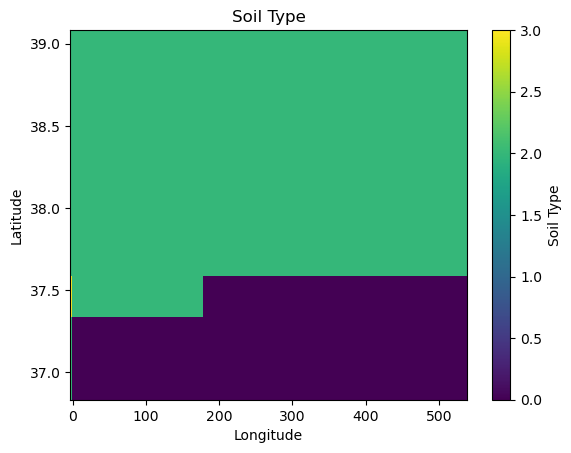

In [30]:
ds = xr.open_dataset('download.grib', engine='cfgrib')

# Select the variable of interest (soil type)
soil_type = ds['slt']

# Get the latitude and longitude values
latitude = soil_type.latitude
longitude = soil_type.longitude

# Plotting
plt.pcolormesh(longitude, latitude, soil_type.isel(time=-1), shading='auto', cmap='viridis')
plt.colorbar(label='Soil Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Soil Type')

# Show the plot
plt.show()

# Close the dataset when done
ds.close()

This parameter is the texture (or classification) of soil used by the land surface scheme of the ECMWF Integrated Forecasting System (IFS) to predict the water holding capacity of soil in soil moisture and runoff calculations. It is derived from the root zone data (30-100 cm below the surface) of the FAO/UNESCO Digital Soil Map of the World, DSMW (FAO, 2003), which exists at a resolution of 5' X 5' (about 10 km). The seven soil types are: 1: Coarse, 2: Medium, 3: Medium fine, 4: Fine, 5: Very fine, 6: Organic, 7: Tropical organic. A value of 0 indicates a non-land point. This parameter does not vary in time.